In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
import itertools
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
# Handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [12]:
avidata = pd.read_csv('AviationData.csv',low_memory=False,parse_dates=['Event.Date'], encoding='latin-1')

In [13]:
avidata = avidata[avidata['Country'] == 'United States']
avidata

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87275,20211221104429,Accident,WPR22LA066,2021-12-20,"Phoenix, AZ",United States,033483N,0112836W,NaN,NaN,...,Business,RAINBOW RYDERS INC,0.0,0.0,1.0,15.0,NaN,NaN,NaN,NaN
87277,20211223104439,Accident,GAA22WA054,2021-12-21,"Auxerre, OF",United States,475047N,0032948W,NaN,NaN,...,Unknown,NaN,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
87278,20211228104450,Accident,WPR22LA069,2021-12-22,"Auburn, CA",United States,NaN,NaN,NaN,NaN,...,Positioning,"Fox Two, LLC",0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN
87279,20211227104443,Accident,CEN22FA082,2021-12-26,"Hardy, AR",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


# Calculating Total Injuries of Flight Accidents

In [14]:
total_injuries = ['Total.Fatal.Injuries','Total.Serious.Injuries','Total.Minor.Injuries']
avidata['Total_Injuries'] = avidata[total_injuries].sum(axis=1)
avidata

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Total_Injuries
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN,2.0
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996,4.0
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007,3.0
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000,2.0
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87275,20211221104429,Accident,WPR22LA066,2021-12-20,"Phoenix, AZ",United States,033483N,0112836W,NaN,NaN,...,RAINBOW RYDERS INC,0.0,0.0,1.0,15.0,NaN,NaN,NaN,NaN,1.0
87277,20211223104439,Accident,GAA22WA054,2021-12-21,"Auxerre, OF",United States,475047N,0032948W,NaN,NaN,...,NaN,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,1.0
87278,20211228104450,Accident,WPR22LA069,2021-12-22,"Auburn, CA",United States,NaN,NaN,NaN,NaN,...,"Fox Two, LLC",0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,1.0
87279,20211227104443,Accident,CEN22FA082,2021-12-26,"Hardy, AR",United States,NaN,NaN,NaN,NaN,...,NaN,2.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,2.0


# Indexing with Time Series Data

In [15]:
avidata = avidata.set_index('Event.Date')
avidata.index

DatetimeIndex(['1948-10-24', '1962-07-19', '1974-08-30', '1977-06-19',
               '1979-08-02', '1979-09-17', '1981-08-01', '1982-01-01',
               '1982-01-01', '1982-01-01',
               ...
               '2021-12-14', '2021-12-15', '2021-12-16', '2021-12-16',
               '2021-12-18', '2021-12-20', '2021-12-21', '2021-12-22',
               '2021-12-26', '2021-12-29'],
              dtype='datetime64[ns]', name='Event.Date', length=80998, freq=None)

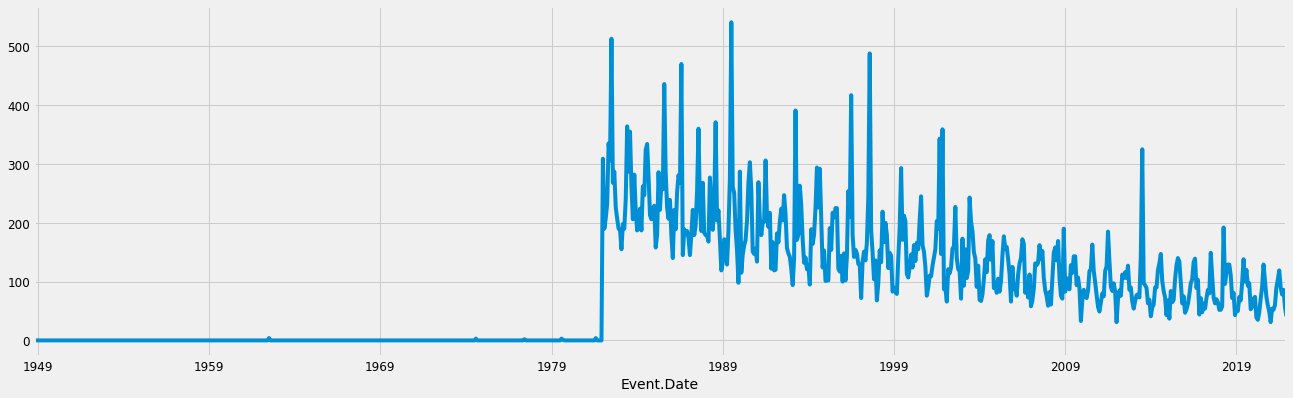

In [16]:
y = avidata['Total_Injuries'].resample('M').sum()
y.plot(figsize=(20, 6))
plt.show()

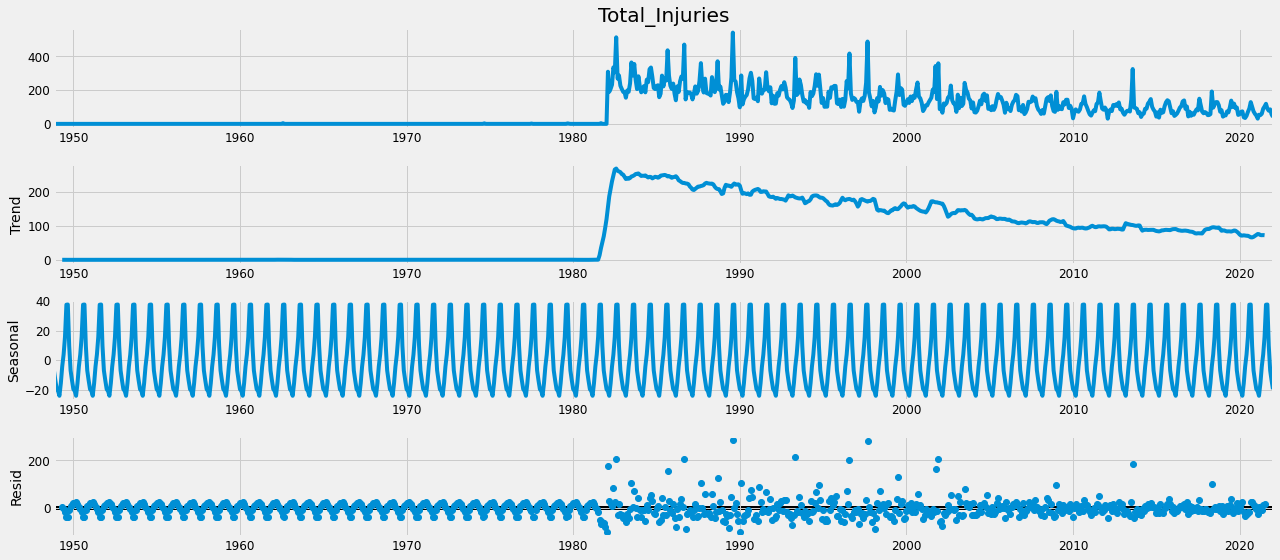

In [17]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

# Time Series Forecasting with ARIMA

In [18]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [19]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,order=param, seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:10965.623682530508
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:10216.449713242491
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:9435.519550600437
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:9164.114071157348
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:9404.933934318344
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:9273.310410773325
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:9182.38283116967
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:9163.770871336083
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:10292.78842733333
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:9880.326111994975
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:9389.666017744636
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:9059.54515441434
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:9354.622448815318
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:9168.187269338887
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:9094.213233614615
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:9057.004970106582
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:9330.676690176395
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:9215.524414877598
ARIMA(0, 1

# Fitting the ARIMA model

In [20]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0313      0.028      1.128      0.259      -0.023       0.086
ma.L1         -0.7522      0.014    -54.427      0.000      -0.779      -0.725
ar.S.L12      -0.0139      0.030     -0.465      0.642      -0.072       0.045
ma.S.L12      -0.8596      0.016    -54.285      0.000      -0.891      -0.829
sigma2      1622.7808     25.956     62.519      0.000    1571.907    1673.655


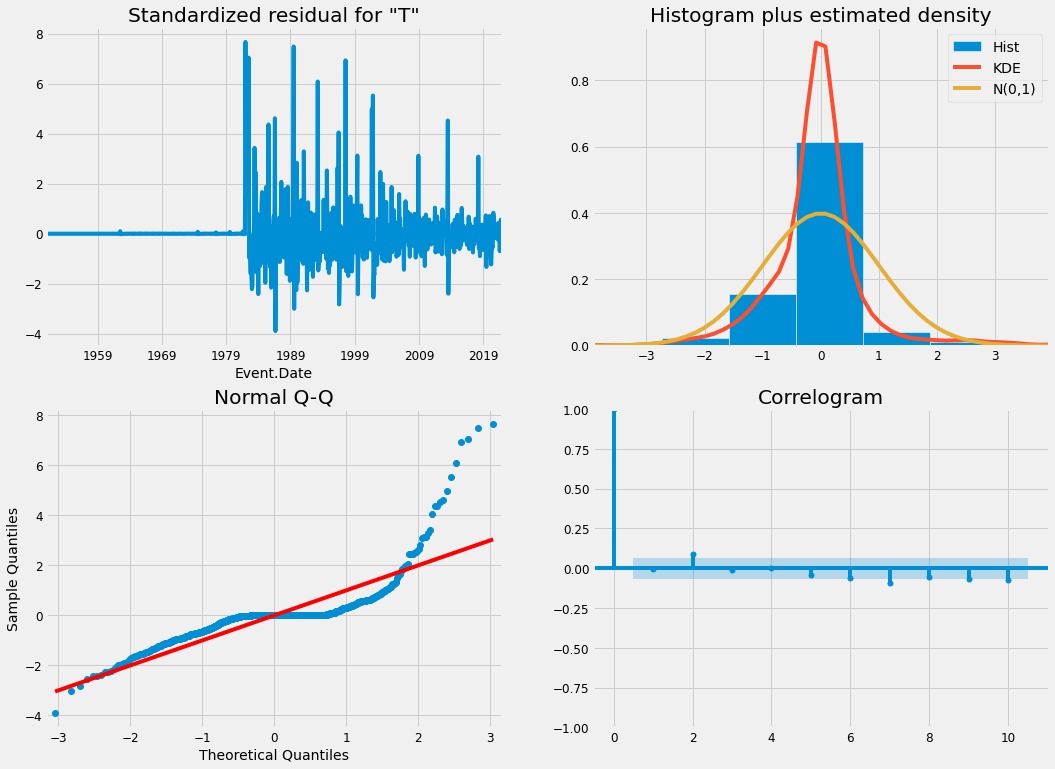

In [33]:
results.plot_diagnostics(figsize=(16, 12))
plt.show()

# Validating forecasts

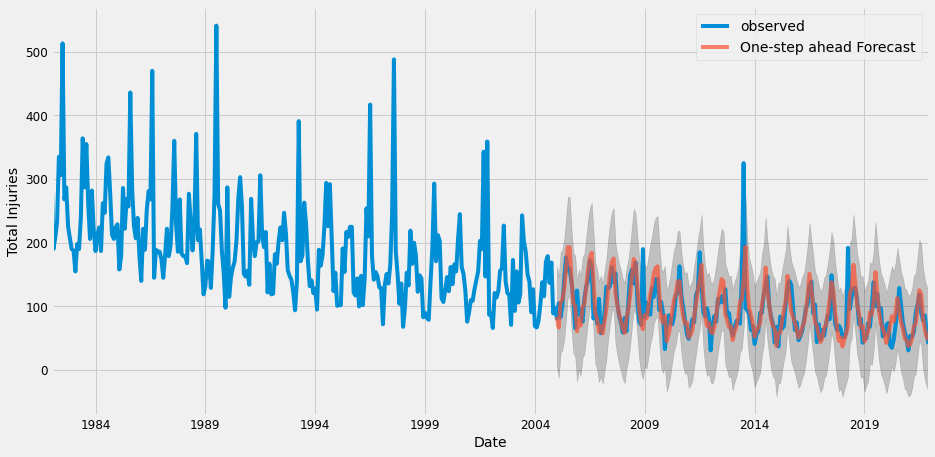

In [26]:
pred = results.get_prediction(start=pd.to_datetime('2005-01-31'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['1982':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Total Injuries')
plt.legend()
plt.show()

In [31]:
y_forecasted = pred.predicted_mean
y_truth = y['2021-12-31':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 38.29
The Root Mean Squared Error of our forecasts is 6.19


# Producing and Visualizing Forecasts

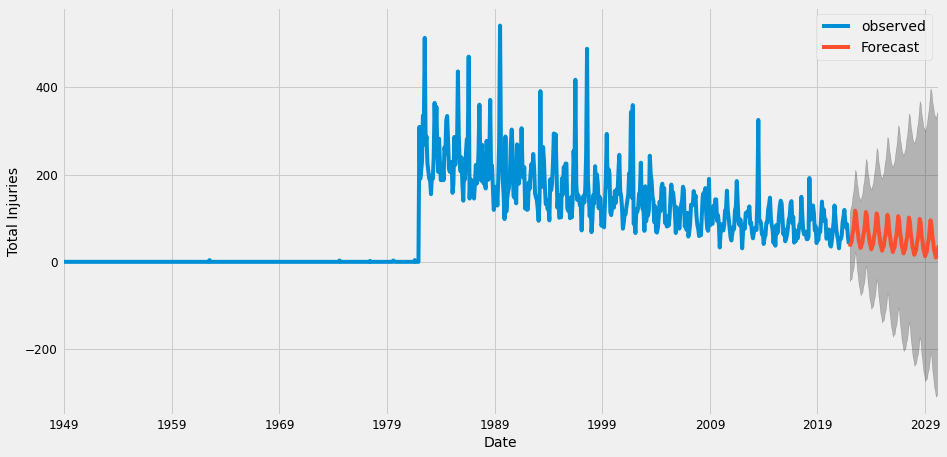

In [27]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Total Injuries')
plt.legend()
plt.show()